# Hack Challenge #1
**by:** Nicha Leethochawalit<br>
This challenge is simple. We ask you to rotate and crop the image. The resulting image should be in fits format with header that contains the correct wcs. This task is taken from real task Nicha had to do during her research.

The image we ask you to rotate is shown below


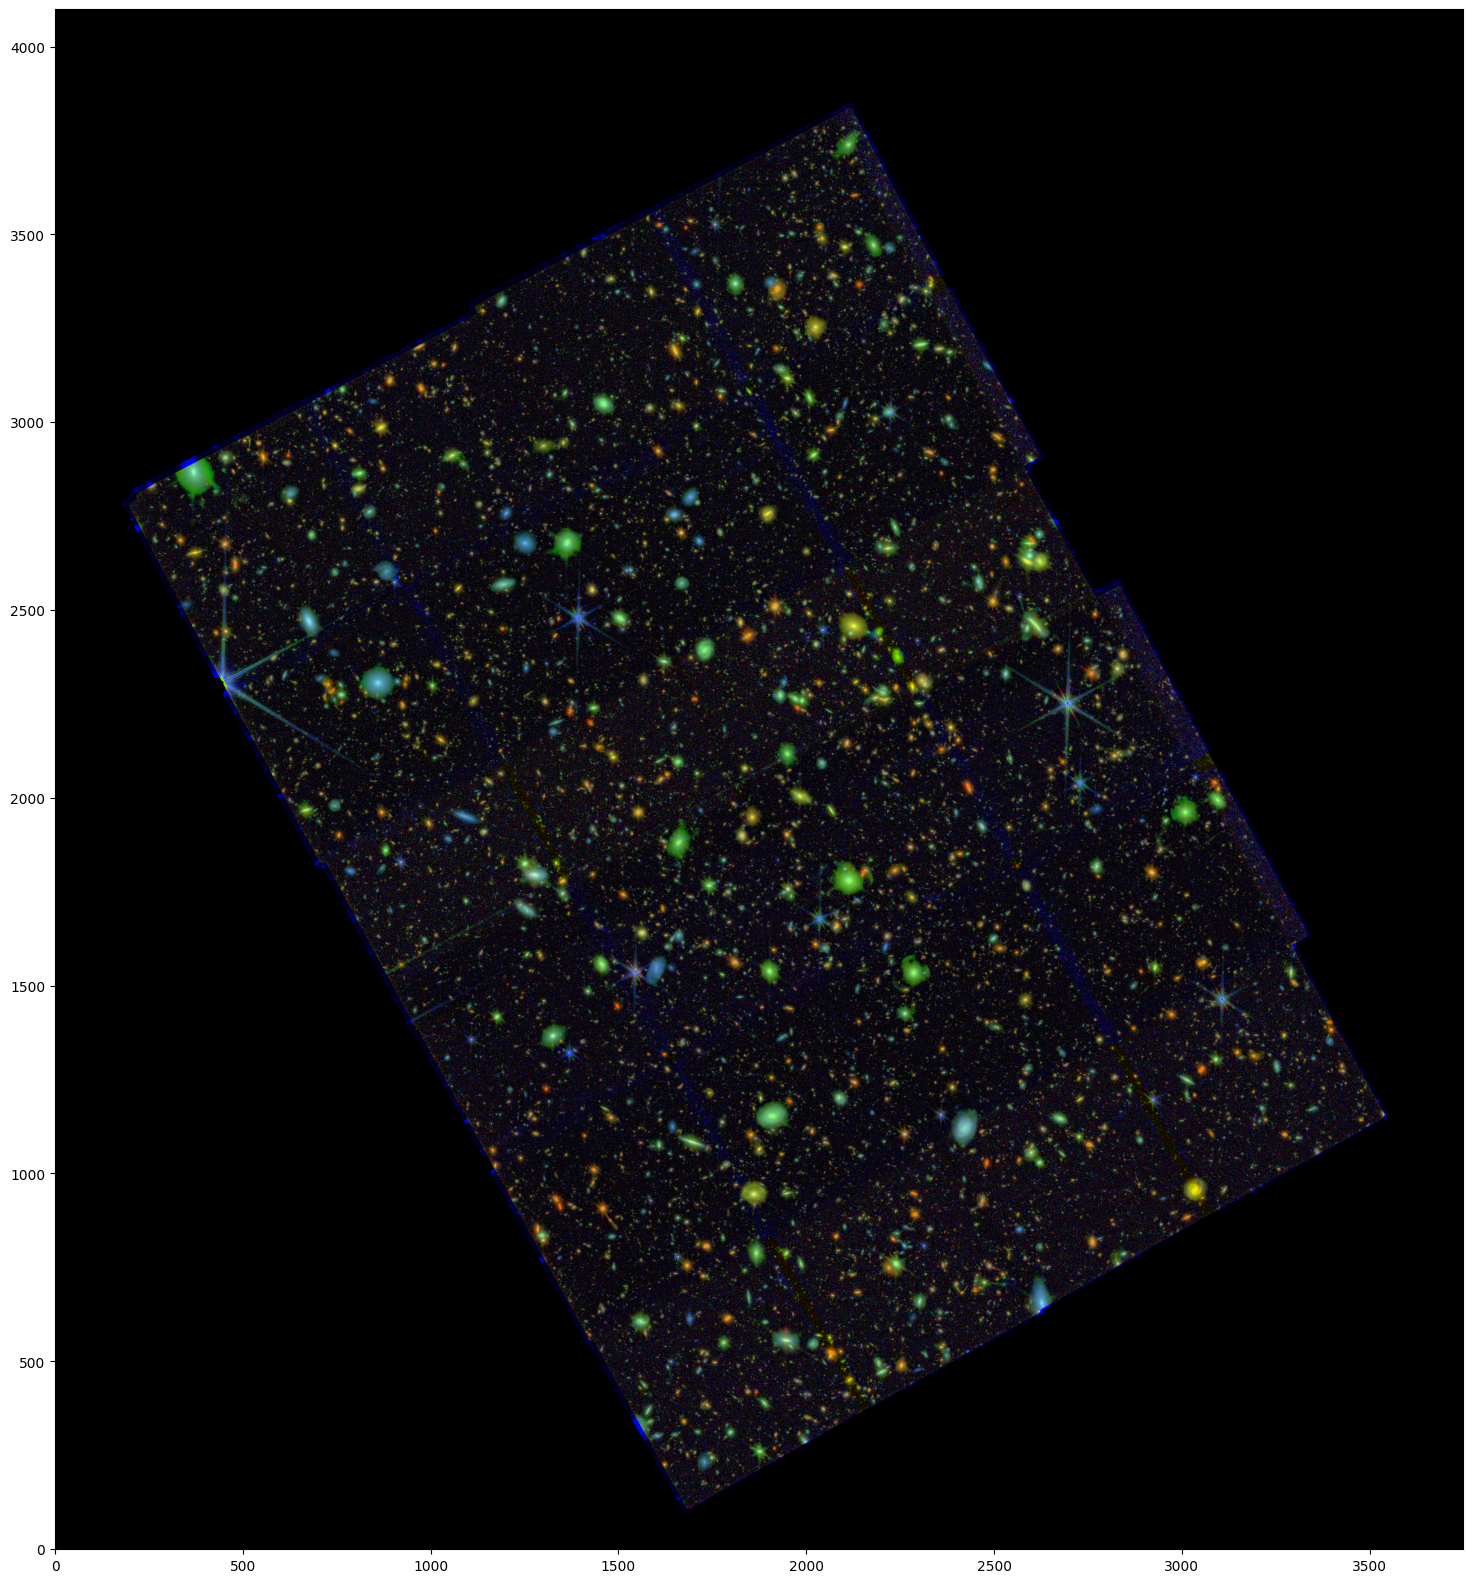

In [6]:
from astropy.visualization import make_lupton_rgb
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np

R_im = fits.getdata('hlsp_jades_jwst_nircam_goods-s-deep_f444w_v1.0_drz.rebinned.fits')
V_im = fits.getdata('hlsp_jades_jwst_nircam_goods-s-deep_f277w_v1.0_drz.rebinned.fits')
B_im = fits.getdata('hlsp_jades_jwst_nircam_goods-s-deep_f115w_v1.0_drz.rebinned.fits')
division = max([np.percentile(R_im,99.9),np.percentile(V_im,99.9),np.percentile(B_im,99.9)])
image_data = make_lupton_rgb(R_im/division, V_im/division, B_im/division, Q=15, stretch=0.02)
fig = plt.figure(figsize=[20,20])
plt.imshow(image_data,origin='lower')
plt.show()

This is the image taken by NIRCAM camera on JWST obtained by the JADES collaboration (the group that developed the NIRCAM and NIRSPEC instruments on JWST) of a 'blank' field. JADES is the largest deep survey program for the first few of years of JWST. The image above is the first release from the survey with exposure times per filter ranging from ~ 4 hr to 16 hrs. The original images are provided in https://archive.stsci.edu/hlsps/jades/. They are >1GB per image. The original size is 15000 pixels x 16400 pixels or 246 megapixels. They are too large to provide in this ASTRO101 course so we rebinned the image to be 16 times coarser.

## The story
Nicha had to perform some completeness calculation for the JADES images (i.e. see how well can we detect faint galaxies in the images). To do so, she had to add thousands of fake galaxies to the images, and recover them. One of the process is to use a program called Source Extractor to run through all pixels in the image and see which group of pixels are objects. She had to repeat the process for hundreds of times. As you can imagine, the program will take very long time to run because the image is huge. One easy way to reduce the running time and pressure on ram is to crop only the science area and to remove the blank surrounding area.

## Key steps
- Rotate and crop the image while keeping the WCS. 

## Outputs
The output image should look like the image below. If we open the input and output fits images in ds9 and set them to Frame>Lock>Frame>Wcs, the two images should perfectly aligned.

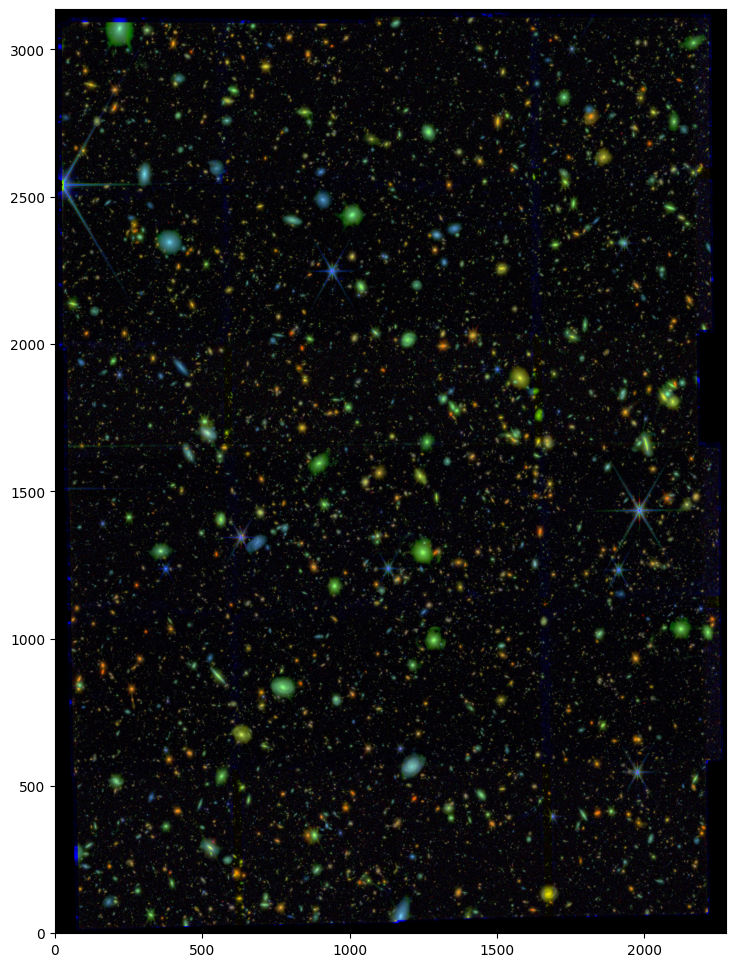

In [3]:
R_im = fits.getdata('hlsp_jades_jwst_nircam_goods-s-deep_f444w_v1.0_drz.rebinned.rotated.fits')
V_im = fits.getdata('hlsp_jades_jwst_nircam_goods-s-deep_f277w_v1.0_drz.rebinned.rotated.fits')
B_im = fits.getdata('hlsp_jades_jwst_nircam_goods-s-deep_f115w_v1.0_drz.rebinned.rotated.fits')
division = max([np.percentile(R_im,99.9),np.percentile(V_im,99.9),np.percentile(B_im,99.9)])
image_data = make_lupton_rgb(R_im/division, V_im/division, B_im/division, Q=15, stretch=0.02)
fig = plt.figure(figsize=[12,12])
plt.imshow(image_data,origin='lower')
plt.show()

In [12]:
# show the orifinal image separately in 2x2 subplots
R_im = fits.getdata('hlsp_jades_jwst_nircam_goods-s-deep_f444w_v1.0_drz.rebinned.fits')
V_im = fits.getdata('hlsp_jades_jwst_nircam_goods-s-deep_f277w_v1.0_drz.rebinned.fits')
B_im = fits.getdata('hlsp_jades_jwst_nircam_goods-s-deep_f115w_v1.0_drz.rebinned.fits')
division = max([np.percentile(R_im,99.9),np.percentile(V_im,99.9),np.percentile(B_im,99.9)])
image_data = make_lupton_rgb(R_im/division, V_im/division, B_im/division, Q=15, stretch=0.02)



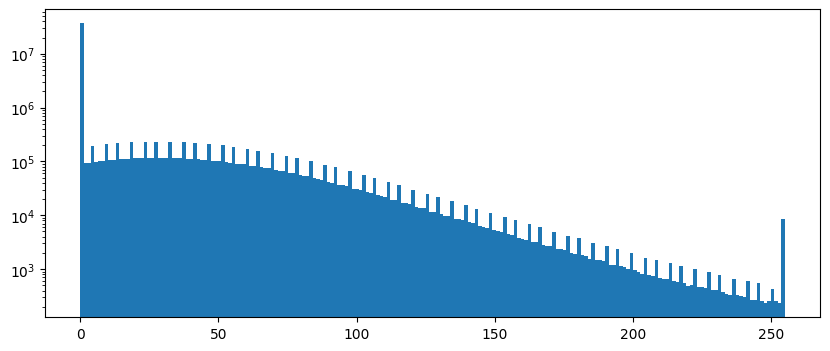

In [20]:
# show histogram of the 'image_data'
fig = plt.figure(figsize=[10,4])
plt.hist(image_data.ravel(),bins=200)
# show the y axis in log scale
plt.yscale('log')
plt.show()

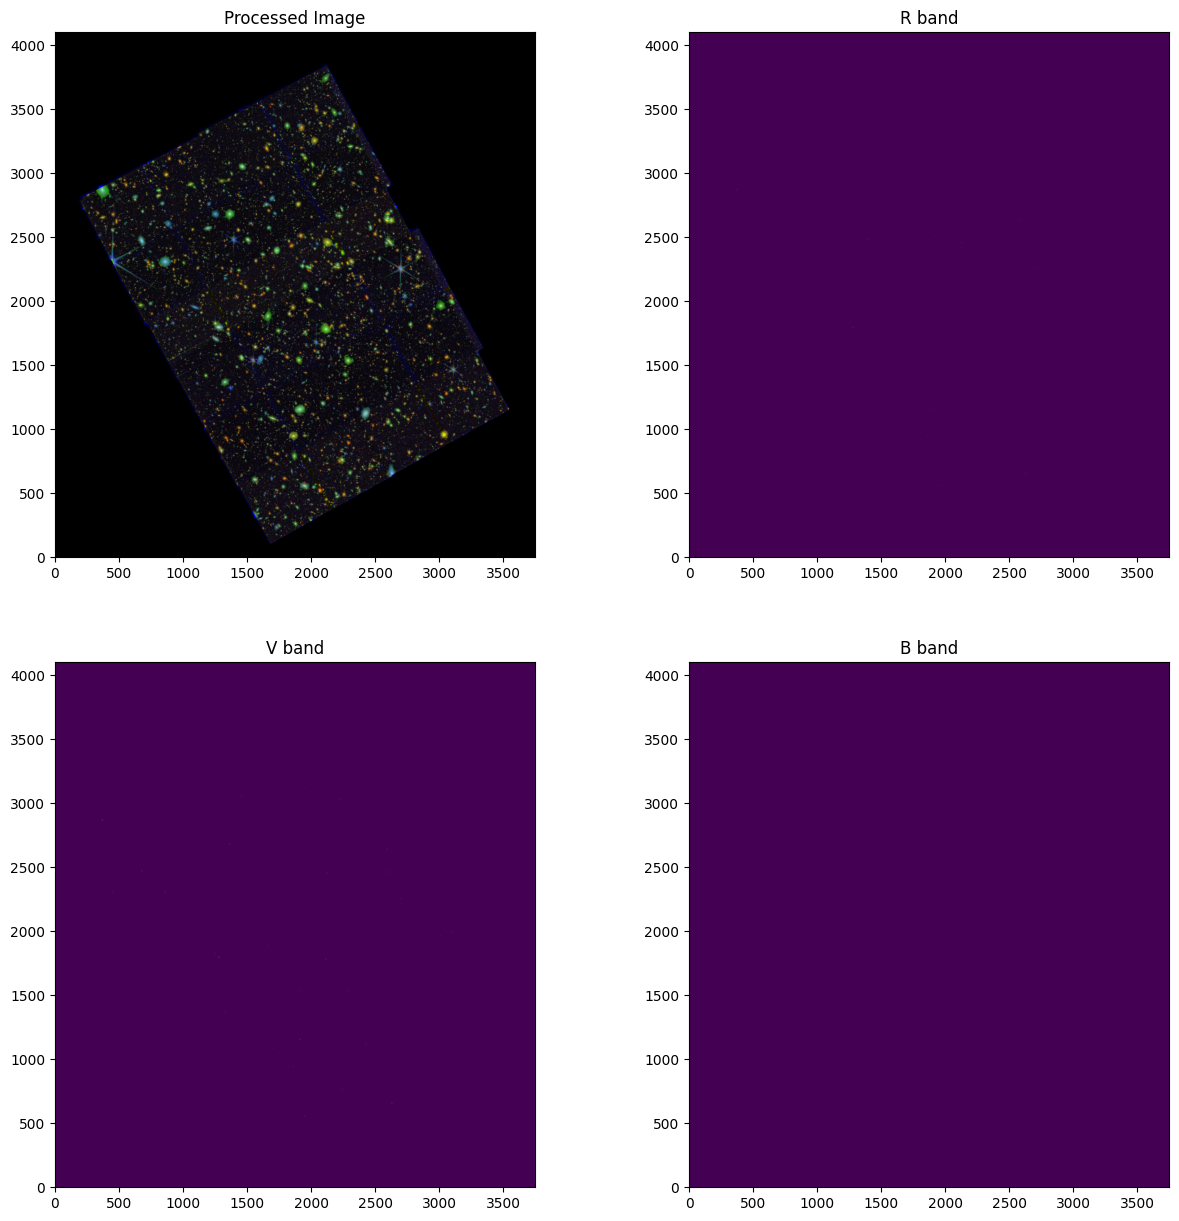

In [13]:
fig = plt.figure(figsize=[15, 15])
ax1 = fig.add_subplot(221)
ax1.imshow(image_data,origin='lower')
ax1.set_title('Processed Image')

ax2 = fig.add_subplot(222)
ax2.imshow(R_im,origin='lower')
ax2.set_title('R band')

ax3 = fig.add_subplot(223)
ax3.imshow(V_im,origin='lower')
ax3.set_title('V band')

ax4 = fig.add_subplot(224)
ax4.imshow(B_im,origin='lower')
ax4.set_title('B band')

plt.show()

In [30]:
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
from scipy import ndimage
from skimage.feature import canny
from skimage.transform import hough_line, hough_line_peaks

print(image_data.shape)
# Convert the RGB image to grayscale for edge detection
gray_image = np.mean(image_data, axis=1)
print(gray_image.shape)

# Detect edges using Canny edge detection
edges = canny(gray_image, sigma=3)

# Perform Hough Line Transform
h, theta, d = hough_line(edges)

# Find the most prominent lines in Hough space
accum, angles, dists = hough_line_peaks(h, theta, d, threshold=0.5 * np.max(h))

# Choose the dominant angle as the rotation angle
rotation_angle_deg = np.mean(angles) - 90  # Subtract 90 to convert to xy axes

# Rotate the image data
rotated_image_data = ndimage.rotate(image_data, rotation_angle_deg, reshape=False, mode='constant', cval=0)

# Display the original and rotated images for visual verification
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_data)
plt.title('Original Image Data')

plt.subplot(1, 2, 2)
plt.imshow(rotated_image_data)
plt.title('Rotated Image Data')

plt.tight_layout()
plt.show()

# Save the rotated and cropped image with updated WCS
# fits.writeto('rotated_cropped_image.fits', cropped_image, header=wcs.to_header(), overwrite=True)


(3750, 3)
(3750,)


ValueError: The parameter `image` must be a 2-dimensional array

In [22]:
# install skimage
! pip install scikit-image

/bin/bash: /home/pkhamchuai/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
  Obtaining dependency information for scikit-image from https://files.pythonhosted.org/packages/19/bd/a53569a0a698d925eb46dbea0bd3b6b62e7287a9ec88b5a03efa8ebd5b14/scikit_image-0.21.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached networkx-3.1-py3-none-any.whl (2.1 MB)
  Obtaining dependency information for imageio>=2.27 from https://files.pythonhosted.org/packages/7b/88/59411e1a652ac3338d348901ffa5a73daf1f67fcb3f97d750237d4fa0821/imageio-2.31.2-py3-none-any.whl.metadata
  Obtaining dependency information for tifffile>=2022.8.12 from https://files.pythonhosted.org/packages/71/44/bc173b3b38adf96bfcc33864f1ac8016d3c03269754b6f1deebba635e952/tifffile-2023.8.25-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 4.6 MB/s eta 0:00:0000:0100:01
  Obtaining dependency information for lazy_loader>=0.2 from https://fi